<a href="https://colab.research.google.com/github/NajwaaAzzahra/PCVK_Ganjil_2024/blob/main/Modul3_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Najwa Azzahra
#TI-3C/19
#2241720139

**Modul 3 PCVK**

1. Mengakses Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Melakukan transformasi linier brightness

 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


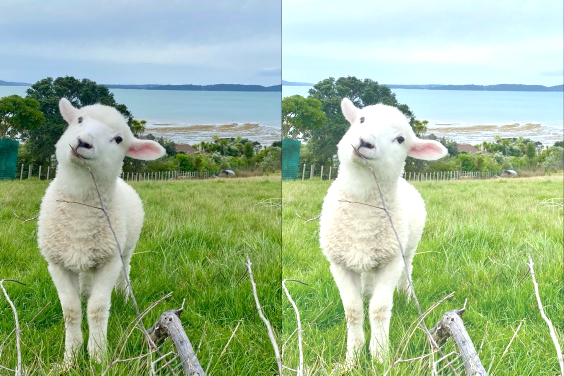

In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')

try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')
    exit()

original = cv2.imread('/content/drive/MyDrive/SEMESTER 5/PCVK/modul3-1.jpg')
original = cv2.resize(original, (0,0), fx=0.5, fy=0.5)
brightness_image = np.zeros(original.shape, original.dtype)

if original is None:
    print("Error: Tidak dapat membaca gambar. Periksa path file.")
    exit()

# Dengan for loop
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

# Tanpa for loop
# brightness_image = cv2.convertScaleAbs(original, beta=brightness)

final_frame = cv2.hconcat([original, brightness_image])
cv2_imshow(final_frame)

## TUGAS

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

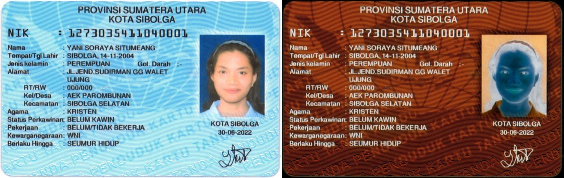

In [3]:
ktp = cv2.imread('/content/drive/MyDrive/SEMESTER 5/PCVK/modul3-2.jpg')
ktp = cv2.resize(ktp, (0,0), fx=0.5, fy=0.5)
inverse_image = 255 - ktp

final_frame = cv2.hconcat([ktp, inverse_image])
cv2_imshow(final_frame)

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga menghasilkan keluaran seperti berikut:

 Mengubah kontras dan tingkat kecerahan citra 
----------------------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan kontras [1.0 - 3.0]: 2


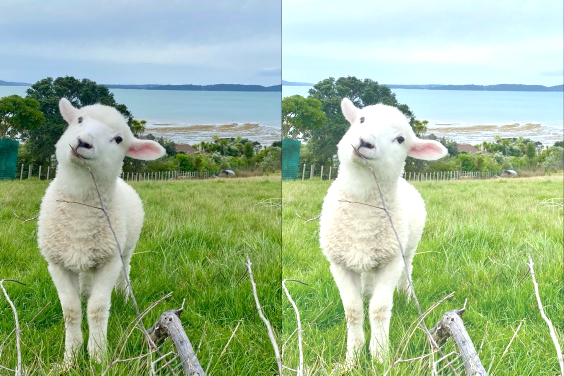

In [4]:
print(' Mengubah kontras dan tingkat kecerahan citra ')
print('----------------------------------------------')
try:
  beta = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))
  alpha = float(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')
  exit()

# Mengubah tipe data untuk operasi aritmatika
img = original.astype(np.float32)

# Sesuai rumus, g(x, y) = a ∗ f(x, y) + b
new_img = alpha * img + beta

# Mengubah tipe data kembali menjadi uint8
new_img = np.uint8(np.clip(new_img, 0, 255))

final_frame = cv2.hconcat([original, brightness_image])
cv2_imshow(final_frame)

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi log, sehingga menghasilkan keluaran seperti berikut:

 Mengubah tingkat kecerahan citra dengan Transformasi Log 
----------------------------------------------------------
Masukkan nilai kecerahan: 50


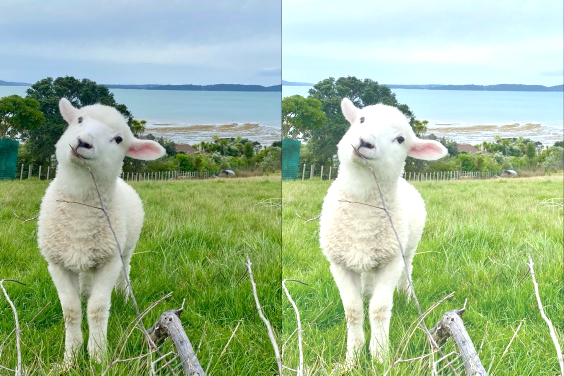

In [5]:
print(' Mengubah tingkat kecerahan citra dengan Transformasi Log ')
print('----------------------------------------------------------')
try:
  beta = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')
  exit()

# Mengubah tipe data untuk operasi aritmatika
img = original.astype(np.float32)

# Sesuai rumus, s = c ∗ log(1 + r)
c = 255 / np.log(1 + np.max(img))
new_img = c * np.log(1 + img) + beta

# Mengubah tipe data kembali menjadi uint8
new_img = np.uint8(np.clip(new_img, 0, 255))

final_frame = cv2.hconcat([original, brightness_image])
cv2_imshow(final_frame)

4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness, dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

In [7]:
import matplotlib.pyplot as plt

# Pisahkan berdasarkan channels
ktp = cv2.imread('/content/drive/MyDrive/SEMESTER 5/PCVK/modul3-2.jpg')
ktp = cv2.resize(ktp, (0,0), fx=0.5, fy=0.5)
ktp = cv2.cvtColor(ktp, cv2.COLOR_BGR2RGB)
R, G, B = ktp[:,:,0], ktp[:,:,1], ktp[:,:,2]

a. averaging

In [8]:
grayscale_avg = (R + G + B) / 3

b. lightness

In [9]:
grayscale_lightness = (np.max(ktp, axis=2) + np.min(ktp, axis=2)) / 2

c. luminance

In [10]:
grayscale_luminance = 0.21 * R + 0.72 * G + 0.07 * B

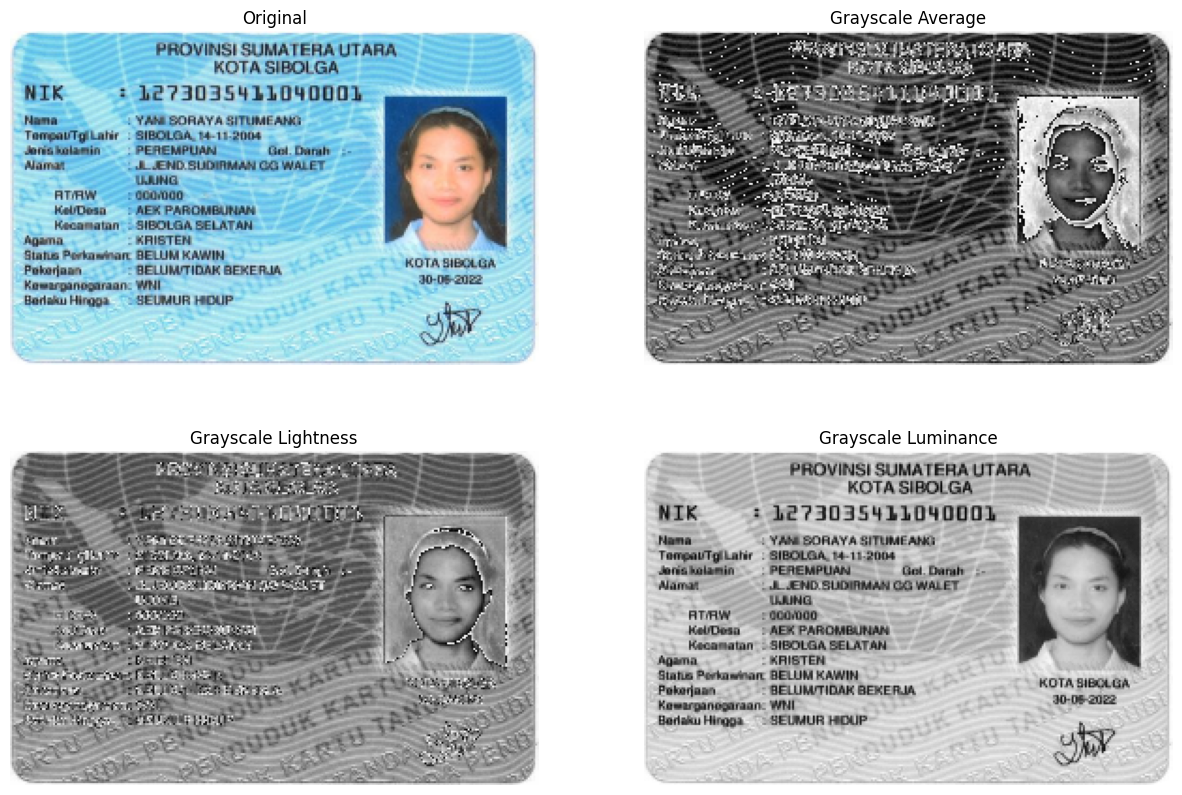

In [11]:
plt.figure(figsize=(15, 10))

# Original
plt.subplot(2, 2, 1)
plt.title('Original')
plt.imshow(ktp)
plt.axis('off')

# Grayscale Average
plt.subplot(2, 2, 2)
plt.title('Grayscale Average')
plt.imshow(grayscale_avg, cmap='gray')
plt.axis('off')

# Grayscale Lightness
plt.subplot(2, 2, 3)
plt.title('Grayscale Lightness')
plt.imshow(grayscale_lightness, cmap='gray')
plt.axis('off')

# Grayscale Luminance
plt.subplot(2, 2, 4)
plt.title('Grayscale Luminance')
plt.imshow(grayscale_luminance, cmap='gray')
plt.axis('off')

plt.show()

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal, tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna biru menjadi grayscale seperti pada contoh berikut:

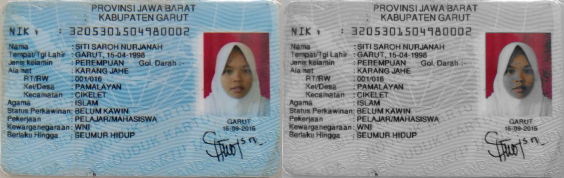

In [14]:
ktp = cv2.imread('/content/drive/MyDrive/SEMESTER 5/PCVK/modul3-3.jpg')
ktp = cv2.resize(ktp, (0,0), fx=0.5, fy=0.5)
# ktp = cv2.cvtColor(ktp, cv2.COLOR_BGR2RGB)

# Define color range for red background (RGB format)
lower_bound = np.array([0, 0, 100], dtype=np.uint8)
upper_bound = np.array([100, 100, 255], dtype=np.uint8)

# Create a mask for the blue color range
color_mask = cv2.inRange(ktp, lower_bound, upper_bound)

# gray image
gray_image = cv2.cvtColor(ktp, cv2.COLOR_RGB2GRAY)
gray_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2RGB)

image = np.zeros_like(ktp)
image[color_mask != 0] = ktp[color_mask != 0]
image[color_mask == 0] = gray_image[color_mask == 0]

final_frame = cv2.hconcat([ktp, image])
cv2_imshow(final_frame)